In [79]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

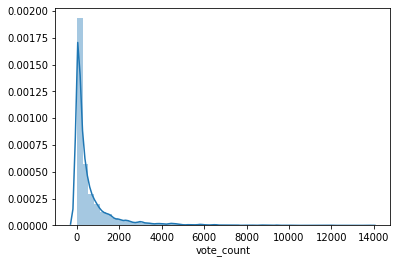

In [6]:
sns.distplot(df['vote_count'])

In [8]:
df.head(3)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


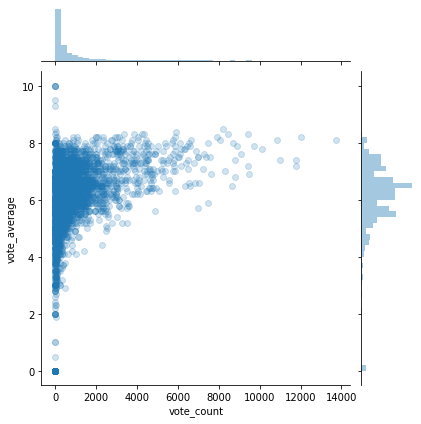

In [10]:
sns.jointplot(x='vote_count',y='vote_average',data=df,alpha=0.2)

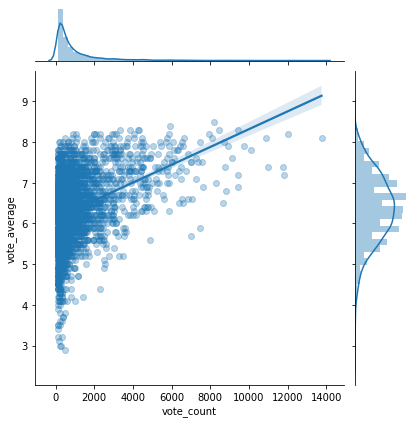

In [18]:
df = df[df['vote_count']>100]
sns.jointplot(x='vote_count',y='vote_average',data=df,kind = 'reg',joint_kws={'scatter_kws':{'alpha':0.3}})

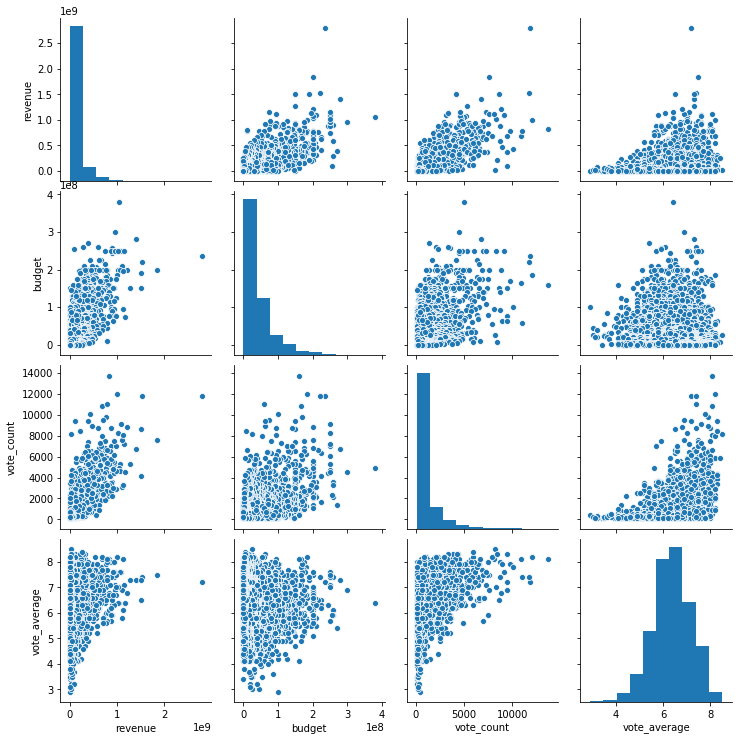

In [22]:
sns.pairplot(df[['revenue','budget','vote_count','vote_average']])

In [24]:
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

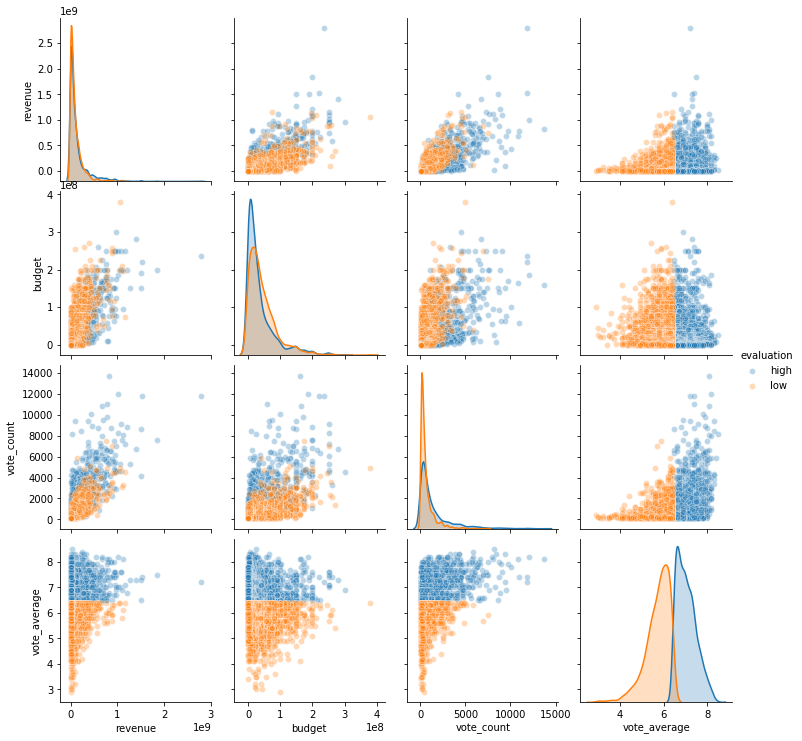

In [28]:
sns.pairplot(df[['revenue','budget','vote_count','vote_average','evaluation']],
            hue = 'evaluation',
            plot_kws={'alpha':0.3})

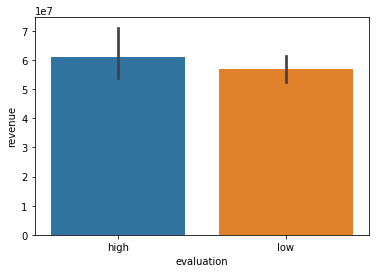

In [32]:
sns.barplot(x ='evaluation',y='revenue',data=df , estimator = np.median)

In [33]:
df['year']=df['release_date'].apply(lambda x: x[:4] )

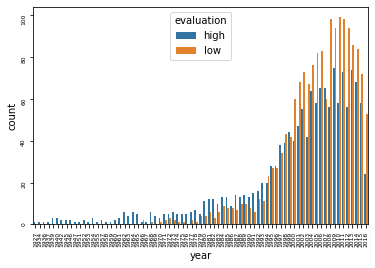

In [39]:
ax = sns.countplot(x='year',data=df,hue = 'evaluation')
ax.tick_params(rotation=90,labelsize=6)

In [40]:
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

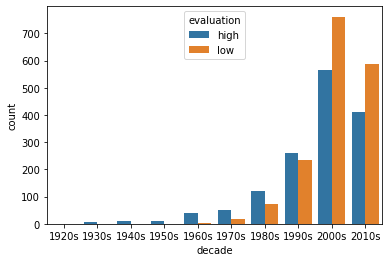

In [43]:
sns.countplot(x = 'decade',data = df.sort_values('decade') ,hue = 'evaluation')

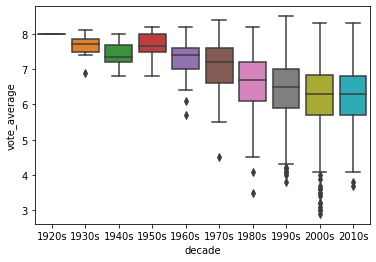

In [45]:
sns.boxplot(x = 'decade',y='vote_average',data=df.sort_values('decade'))

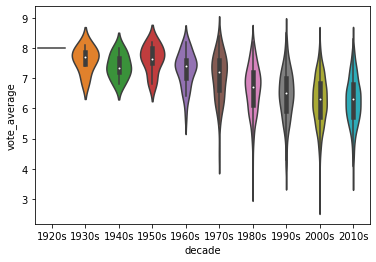

In [46]:
sns.violinplot(x = 'decade',y='vote_average',data=df.sort_values('decade'))

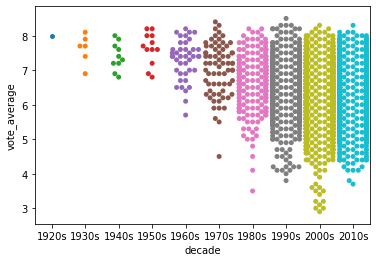

In [47]:
sns.swarmplot(x = 'decade',y='vote_average',data=df.sort_values('decade'))

In [48]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

In [49]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [51]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [58]:
df = df.loc[(df != 0).all(axis = 1)]

In [59]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


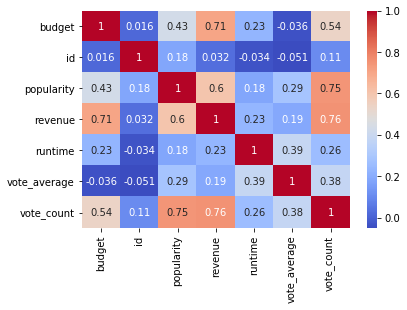

In [62]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

In [68]:
df['year']=df['release_date'].apply(lambda x: x[:4] )
df['month']=df['release_date'].apply(lambda x:x[5:7])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
revenue_df = df.groupby(['year','month']).mean()[['revenue']].pivot_table(values='revenue',index='month',columns='year')

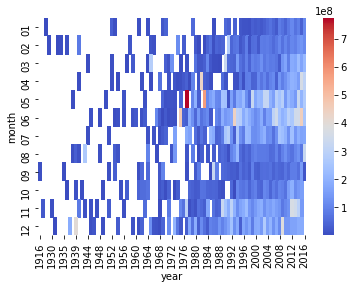

In [77]:
sns.heatmap(revenue_df,cmap='coolwarm')

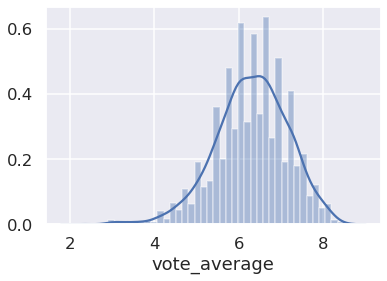

In [83]:

sns.set(context='talk')

sns.distplot(df['vote_average'])

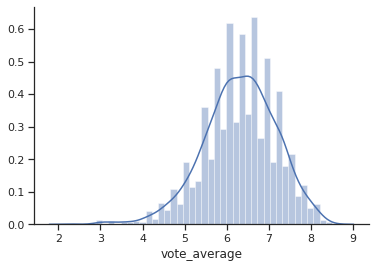

In [86]:
sns.set(context='notebook',style='ticks')
sns.distplot(df['vote_average'])
sns.despine()


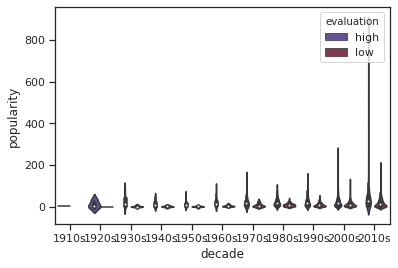

In [100]:
sns.set(context='notebook',style='ticks',palette='dark')
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
df=df[~df['release_date'].isna()]
df['decade']=df['release_date'].apply(lambda x: x[:3]+'0s')
df['evaluation']=df['vote_average'].apply(lambda x: 'high' if x>df['vote_average'].median() else 'low')
sns.violinplot(x='decade',y='popularity',data=df.sort_values('decade'),hue='evaluation',palette='twilight')

Text(0.5, 0, 'x')

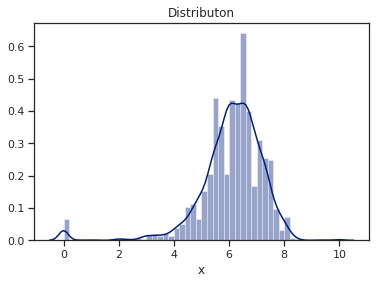

In [101]:
sns.distplot(df['vote_average'])
plt.title('Distributon')
plt.xlabel('x')